In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# True Match Expected

In [ ]:
# Load CSV
df = pd.read_csv("recognition_log.csv")

# # Subtract 15 from the Confidence column (Temporary for testing)
# df['Confidence'] = df['Confidence'] - 15

In [40]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Find start and end times
start_time = df['Timestamp'].min()
end_time = df['Timestamp'].max()
mid_time = start_time + (end_time - start_time) / 2

# Filter to middle 5 seconds
middle_df = df[
    (df['Timestamp'] >= mid_time - pd.Timedelta(seconds=2.5)) &
    (df['Timestamp'] <= mid_time + pd.Timedelta(seconds=2.5))
]

In [41]:
# Classify rows based on Confidence
middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'False Non-Match' if x > 50 else 'True Match')

# Count number of each MatchType across all runs
match_counts_1 = middle_df['MatchType'].value_counts()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_25864\4139867005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'False Non-Match' if x > 50 else 'True Match')


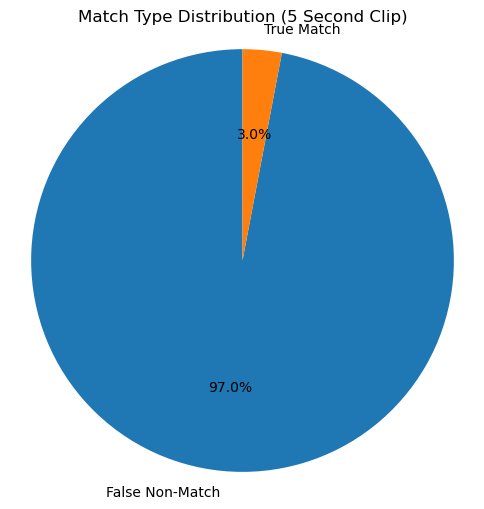

In [42]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(match_counts_1, labels=match_counts_1.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Type Distribution (5 Second Clip)")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

# True Non-Match Expected

In [ ]:
# Load CSV
df = pd.read_csv("recognition_log_non_match.csv")

# # Subtract 20 from the Confidence column (Temporary for testing)
# df['Confidence'] = df['Confidence'] - 20

In [44]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Find start and end times
start_time = df['Timestamp'].min()
end_time = df['Timestamp'].max()
mid_time = start_time + (end_time - start_time) / 2

# Filter to middle 5 seconds
middle_df = df[
    (df['Timestamp'] >= mid_time - pd.Timedelta(seconds=2.5)) &
    (df['Timestamp'] <= mid_time + pd.Timedelta(seconds=2.5))
]

In [45]:
# Classify rows based on Confidence
middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'True Non-Match' if x > 50 else 'False Match')

# Count number of each MatchType across all runs
match_counts_2 = middle_df['MatchType'].value_counts()

C:\Users\Alexander\AppData\Local\Temp\ipykernel_25864\4044853673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['MatchType'] = middle_df['Confidence'].apply(lambda x: 'True Non-Match' if x > 50 else 'False Match')


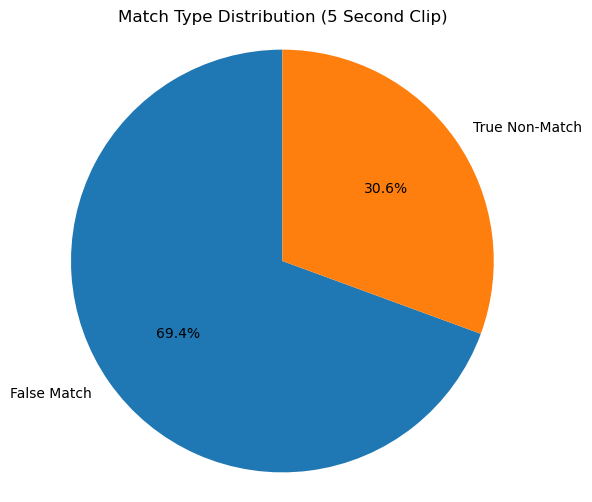

In [46]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(match_counts_2, labels=match_counts_2.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Type Distribution (5 Second Clip)")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

# Combined Data

In [49]:
combined_counts = match_counts_1.add(match_counts_2, fill_value=0)
combined_counts = combined_counts.astype(int)
combined_counts

MatchType
False Match         93
False Non-Match    130
True Match           4
True Non-Match      41
Name: count, dtype: int32

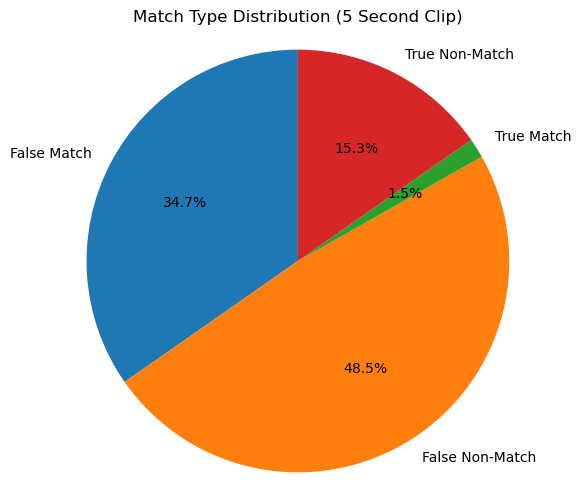

In [ ]:
# Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Match Type Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()